In [102]:
columns = ['population','profit']
data = pd.read_csv('data.txt',names=columns)
data.head()
## Loaded data

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [103]:
X = data.iloc[:, 0]
y = data.iloc[:, 1]

Text(0, 0.5, 'Profit in $10,000')

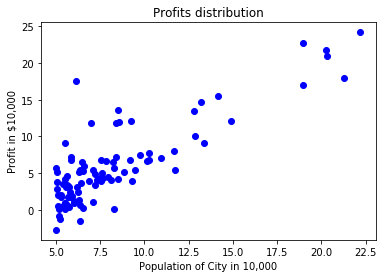

In [104]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], marker='o', c='b')
plt.title('Profits distribution')
plt.xlabel('Population of City in 10,000')
plt.ylabel('Profit in $10,000')    ##EDA

In [105]:
import numpy

In [106]:
 m = len(y)
def compute_cost(X, y, theta):
    predictions = X.dot(theta).flatten()
    sqErrors = np.square(predictions - y)
    J = np.sum((1.0 / (2 * m)) * sqErrors)
    return J

In [107]:

it = np.ones(shape=(m, 2))
it[:, 1] = X


In [108]:
theta = np.zeros(shape=(2, 1)) ##initializing theta 

In [109]:
iterations = 1500 ## initializing alpha and number of iterations
alpha = 0.01

In [110]:
print(compute_cost(it, y, theta))

32.07273387745567


In [111]:
def gradient_descent(X, y, theta, alpha, num_iters):
    J_history = np.zeros(shape=(num_iters, 1))
    for i in range(num_iters):

        predictions = X.dot(theta).flatten()

        errors_x1 = (predictions - y) * X[:, 0]
        errors_x2 = (predictions - y) * X[:, 1]

        theta[0][0] = theta[0][0] - alpha * (1.0 / m) * errors_x1.sum()
        theta[1][0] = theta[1][0] - alpha * (1.0 / m) * errors_x2.sum()

        J_history[i, 0] = compute_cost(X, y, theta)

    return theta

In [112]:
theta = gradient_descent(it, y, theta, alpha, iterations)
print(theta)

[[-3.63029144]
 [ 1.16636235]]


In [113]:
print(compute_cost(it,y,theta)) ## cost function has been minimized

4.483388256587725


There is a huge difference between both the values of cost function with differnt theta.It has reached a lower value.

In [114]:
predict1 = np.array([1, 3.5]).dot(theta).flatten()
print('For population = 35,000, we predict a profit of %f' % (predict1 * 10000))
predict2 = np.array([1, 7.0]).dot(theta).flatten()
print('For population = 70,000, we predict a profit of %f' % (predict2 * 10000))


For population = 35,000, we predict a profit of 4519.767868
For population = 70,000, we predict a profit of 45342.450129


In [115]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [116]:
X = data.iloc[:, 0].values.reshape(-1,1)
y = data.iloc[:, 1].values.reshape(-1,1)
regressor = LinearRegression()  
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [117]:
test = [[3.5],[7]]
y_pred = regressor.predict(test)

In [118]:
print('For population = 35,000, we predict a profit of %f' % (y_pred[0][0] * 10000))
print('For population = 70,000, we predict a profit of %f' % (y_pred[1][0] * 10000))

For population = 35,000, we predict a profit of 2798.368764
For population = 70,000, we predict a profit of 44554.546310


In [129]:
print('For population = 35,000, the differnce between two values is %f' % (y_pred[0][0] * 10000 - predict1*10000))
print('For population = 70,000, the differnce between two values is %f' % (y_pred[1][0] * 10000 - predict2*10000))

For population = 35,000, the differnce between two values is -1721.399104
For population = 70,000, the differnce between two values is -787.903819
